<a href="https://colab.research.google.com/github/kushpal/Machine-Learning/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

**Implement a function for hard margin SVM in primal form using cvxpy. For keeping this task simple assume w is two dimensional, i.e. y^(x ) = SIGN ( w1 x1 + w2 x2 + b ) where x and w are both two dimensional vectors.**

---

In [0]:
import numpy as np
import pandas as pd
df = pd.read_csv("iris.csv") # Import data
temp=df.iloc[:,-1]

In [0]:
df.drop('SepalWidthCm',axis=1,inplace=True)
df.drop('PetalLengthCm',axis=1,inplace=True)
df.drop('Id',axis=1,inplace=True)

In [0]:
df.Species[df.Species=='Iris-setosa']=1
df.Species[df.Species=='Iris-virginica']=-1
df.Species[df.Species=='Iris-versicolor']=-1

In [0]:
df=df.sample(frac=1).reset_index(drop=True)
df.head()

,SepalLengthCm,PetalWidthCm,Species
0,5.4,0.4,1
1,6.3,1.8,-1
2,6.1,1.3,-1
3,5.6,1.5,-1
4,5.4,0.2,1


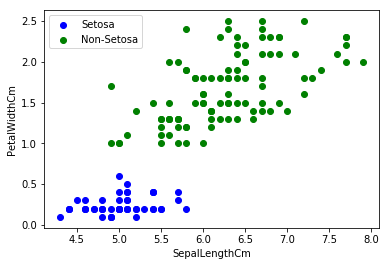

In [0]:
ds=pd.read_csv("iris.csv")
ds=ds.drop(['SepalWidthCm','PetalLengthCm','Id'],axis=1)
y=ds['Species']
x=ds.drop(['Species'],axis=1)
X1=[]
X2=[]
l=0
ax1,ax2,ax3 = [108,0],[75,0],[90,0]
ay1,ay2,ay3 = [4.5,7.5],[4.5,6.5],[4.5,7]
bx1,bx2,bx3 = [4,8],[4,8],[4,8]
by1,by2,by3 = [0.6,0.7],[0.7,0.8],[0.8,0.9]

for i in y:
    if i=="Iris-setosa":
        X1.append(x.loc[l])
    else:
        X2.append(x.loc[l])
    l+=1
X1=np.array(X1)
X2=np.array(X2)
plt.scatter(X1[:,:1],X1[:,1:2],color='blue')
plt.scatter(X2[:,:1],X2[:,1:2],color='green')
plt.ylabel("PetalWidthCm")
plt.xlabel("SepalLengthCm")
plt.legend(['Setosa','Non-Setosa'])

In [0]:
# Form SVM with L1 regularization problem.
from cvxpy import *


In [0]:
df.head()

,SepalLengthCm,PetalWidthCm,Species
0,5.4,0.4,1
1,6.3,1.8,-1
2,6.1,1.3,-1
3,5.6,1.5,-1
4,5.4,0.2,1


---

>**(a)** SVM Function for hard margin.

---


<br>

---

>>**(i)**Show the usage of your implementation on the IRIS dataset. We will only be making use of sepal-length
and petal-width as the two features. We have only two classes - Setosa and Not-Setosa. This problem is
linearly separable. For showing your implementation, train the hard margin SVM using all the data.

---

In [0]:
import cvxpy as cp
def hard_margin_SVM(X,Y):
    #print(X.shape())
    n=2
    w = cp.Variable(n)
    #print(X@beta)
    b = cp.Variable()
    loss = cp.sum(cp.pos(1 - cp.multiply(Y, X*w + b)))
    #reg = norm(beta, 1)
    #lambd = Parameter(nonneg=True)
    prob = cp.Problem(cp.Minimize(loss))# + lambd*reg))
    prob.solve()
    print(w.value,b.value)
    return w,b

In [0]:
X=df.iloc[:,[0,2]].values
Y=df.iloc[:,-1].values
w1,b1=hard_margin_SVM(X,Y)

[5.03083076e-06 1.60000544e+00] -2.7549931620405044e-05


In [0]:
w_1=w1[0].value
w_2=w1[1].value
b_1=b1.value

<br>

---

>>**(ii)**cvxpy also allows you to see the dual values. Can you compute the dual values? What do they mean?

---

In [0]:
n=2
w2 = cp.Variable(n)
b2 = cp.Variable()
reg = cp.norm(w2, 2)
obj=cp.Minimize(reg)
constraints=[(cp.multiply(Y, X*w2 - b2))>=1]
prob2=cp.Problem(obj,constraints)
prob2.solve()
dual_vals=(constraints[0].dual_value)

In [0]:
print(w2.value)
indxs=sorted(range(len(dual_vals)), key=lambda i: dual_vals[i], reverse=True)[:20]

[-1.13095737e-11  1.00000000e+00]


*Examples with larger dual values have large importance in deciding the boundary.*

<br>

---

>>**(iii)** Plot the decision boundary (separating hyperplane) in dark black and the margins in dotted line. Encircle
the support vector points.

---

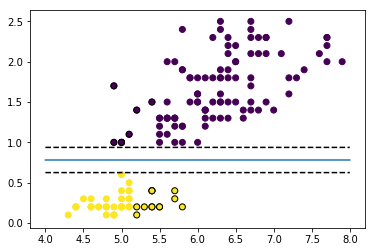

In [0]:
import matplotlib.pyplot as plt
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=df.iloc[:,-1])
plt.scatter(df.iloc[indxs,0],df.iloc[indxs,1],c=df.iloc[indxs,-1],edgecolors='k')

x1=np.linspace(4, 8, 6)
x2=(w_1*x1+b_1+1.25)/w_2
x3=((w_1*x1+b_1+1)/w_2)
x4=((w_1*x1+b_1+1.5)/w_2)
plt.plot(x1,x2)
plt.plot(x1,x3,'k--')
plt.plot(x1,x4,'k--')
plt.show()

In [0]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    print("MIN-MAX=",x_min,y_min)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    return xx, yy


In [0]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


MIN-MAX= 3.3 -0.9
(220, 280)


/usr/lib/python3/dist-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


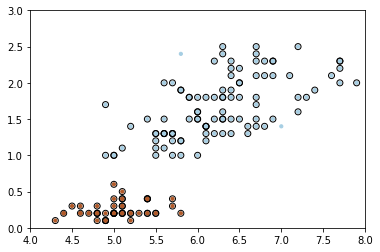

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

X=df.iloc[:,0:2]
y=temp
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=10)
clf.fit(X, y)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=df.iloc[:,-1], s=10, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
YY, XX =make_meshgrid(X.iloc[:,0],X.iloc[:,1])
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

l=np.zeros(Z.shape)

for p in range(len(Z)):
    for q in range(len(Z[0])):
        if Z[p][q]=='Iris-setosa':
            l[p][q]=1
        else:
            l[p][q]=-1
l=np.asarray(l)
l=l.reshape(Z.shape)

print(l.shape)

# plot decision boundary and margins
ax.contour(XX, YY, l, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
ax.set_xlim(4, 8)
ax.set_ylim(0, 3)


# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],linewidth=1, facecolors='none', edgecolors='k')
plt.show()

<br>

---

>>**(iv)** Plot the decision boundary in dark black and the margins in dotted line. This time use sklearn’s SVM
with linear kernel. Encircle the support vector points. Do you get the same answer as when you use your
own SVM?

---

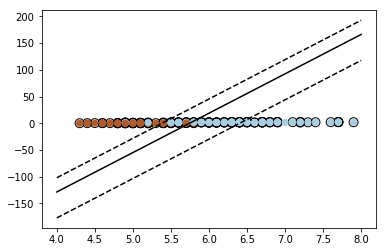

In [0]:

from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

X=df.iloc[:,0:2]
y=temp
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(4, 8)
yy = a * xx - (clf.intercept_[0]) / w[1]-0.5

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0]+0.8)
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0]-1.8)

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none',edgecolors='k')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, cmap=plt.cm.Paired)

plt.axis('tight')
plt.show()

<br>


---

>>**(v)** If you throw away all the points except the support vectors does your decision boundary remain the
same? Why? 

**Ans:**

*If Non-Support Vectors are thrown away that does not make a difference because,ideally alpha is zero for them, and hence do not contribute to decision boundary.*

---

<br>

<br>

---

**Implement a function for soft margin SVM in primal form using cvxpy, but formulated as hinge loss plus
penalty.**

---
<br>



---
>**(ii)** Show the usage of your implementation(s) on the IRIS dataset. For all our experiments, we will only be
making use of sepal-length and sepal-width as the two features. We have only two classes - Virginica and
Not-Virginica. This problem is not linearly separable.

---


In [0]:
def soft_margin_SVM(X,Y):
    n=2
    w2 = cp.Variable(n)
    b2 = cp.Variable()
    ei=cp.Variable()
    reg = cp.norm(w2, 2)+cp.sum(ei)
    obj=cp.Minimize(reg)
    constraints=[(cp.multiply(Y, X*w2 - b2))>=(1-ei)]
    prob2=cp.Problem(obj,constraints)
    prob2.solve()
    return w2,b2,ei

In [0]:
temp2=df.iloc[:,-1]
df2=df

In [0]:
df2

,SepalLengthCm,PetalWidthCm,Species
0,5.4,0.4,1
1,6.3,1.8,-1
2,6.1,1.3,-1
3,5.6,1.5,-1
4,5.4,0.2,1
5,6.3,2.4,-1
6,4.4,0.2,1
7,5.2,0.2,1
8,6.3,2.5,-1
9,6.7,2.3,-1


In [0]:
temp2=df2.iloc[:,-1]
temp2=temp2[:]

In [0]:
df2.Species[df2.Species=='Iris-setosa']=-1
df2.Species[df2.Species=='Iris-virginica']=1
df2.Species[df2.Species=='Iris-versicolor']=-1

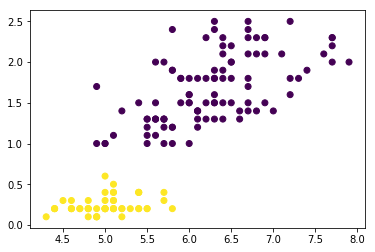

In [0]:
plt.scatter(df2.iloc[:,0],df2.iloc[:,1],c=df2['Species'])
plt.show()

In [0]:
df3 = pd.read_csv("iris.csv") # Import data
df3=df3.drop(['Id'],axis=1)
df3.Species[df3.Species=='Iris-setosa']='Not-virginica'
df3.Species[df3.Species=='Iris-virginica']='Iris-virginica'
df3.Species[df3.Species=='Iris-versicolor']='Not-virginica'


 ---

>>When SL, SW and IV are used

---

In [0]:
X2=df2.iloc[:,0:2].values
Y2=df2.iloc[:,-1].values
w3,b3,e3=soft_margin_SVM(X2,Y2)
print(w3.value,b3.value,e3.value)

[ 2.98353791e-14 -2.38403243e-14] 7.083273060254754e-13 1.0000000000003313


In [0]:
n=2
w2 = cp.Variable(n)
b2 = cp.Variable()
ei=cp.Variable()
reg = cp.norm(w2, 2)+0.5*cp.sum(ei)
obj=cp.Minimize(reg)
constraints=[(cp.multiply(Y2, X2*w2 - b2))>=(1-ei)]
prob2=cp.Problem(obj,constraints)
prob2.solve()
print(w2.value,b2.value,ei.value)
dual_vals2=(constraints[0].dual_value)

[-2.89579562e-14 -6.95285959e-15] 2.937931559454755e-12 1.00000000000261


In [0]:
indxs2=sorted(range(len(dual_vals)), key=lambda i: dual_vals2[i], reverse=True)[:20]
print(dual_vals2[indxs2])

[0.0061377  0.00586473 0.00586473 0.00586473 0.0056379  0.00546948
 0.00546948 0.00546948 0.00545871 0.00530704 0.00530704 0.00516711
 0.0051638  0.0051638  0.0051638  0.00516174 0.00503711 0.00503686
 0.00503686 0.00503686]



### ii)

[-2.89579562e-14 -6.95285959e-15] 2.937931559454755e-12 1.00000000000261


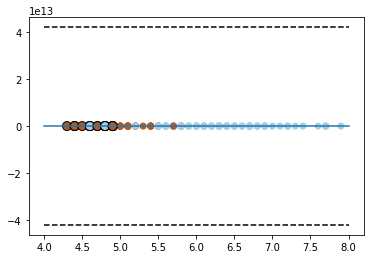

In [0]:
print(w2.value,b2.value,ei.value)
a1=w3[0].value
a2=w3[1].value
e=e3.value
b=b3.value
x1=np.linspace(4, 8, 30)
x2=(-a1*x1)/a2
x3=((-a1*x1+b-e))/a2
x4=((-a1*x1-b+e))/a2
#print(e)
plt.plot(x1,x2)
plt.plot(x1,x3,'k--')
plt.plot(x1,x4,'k--')
plt.scatter(X2[:, 0], X2[:, 1], c=Y2, cmap=plt.cm.Paired)
plt.scatter(X2[indxs2, 0], X2[indxs2, 1], c=Y2[indxs], cmap=plt.cm.Paired,s=80, facecolors='none',edgecolors='k')
plt.show()

<br>

---

>>**(iii)** Plot the decision boundary in dark black and the margins in dotted line. Encircle the support vector
points. Do you get the same answer as when you use sklearn’s SVM?

---

In [0]:
beta = cp.Variable(n)
v = cp.Variable()
eii= cp.Variable()
reg = cp.norm(w2, 2)+cp.sum(eii)
loss = cp.sum(cp.pos(1 - eii - cp.multiply(Y2, X2*beta - v)))
reg = cp.norm(beta, 1)
#lambd = Parameter(sign='positive')
prob = cp.Problem(cp.Minimize(loss/150 + reg))
prob.solve()
print(beta.value,v.value,eii.value)

[-2.27916781e-08 -1.01185176e-08] -1.152962469218789e-07 1.5999998294359672


[-2.27916781e-08 -1.01185176e-08] -1.152962469218789e-07 1.5999998294359672


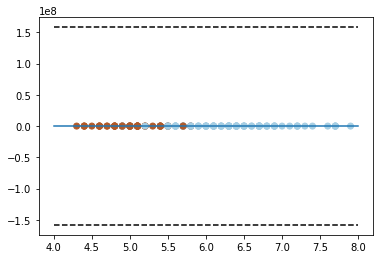

In [0]:
print(beta.value,v.value,eii.value)
a1=beta[0].value
a2=beta[1].value
e=eii.value
b=v.value
x1=np.linspace(4, 8, 30)
x2=(-a1*x1+b)/a2
x3=((-a1*x1+b+e)/a2)
x4=((-a1*x1-b-e)/a2)

plt.plot(x1,x2)
plt.plot(x1,x3,'k--')
plt.plot(x1,x4,'k--')
plt.scatter(X2[:, 0], X2[:, 1], c=df2.iloc[:,-1], cmap=plt.cm.Paired)
plt.show()

<br>

---
>>**(iv)** This time without using soft-margin SVM, we can still solve the problem using kernels. Use sklearn’s
functions and RBF kernel with varying gamma and the polynomial kernel with varying degree on this
dataset. As before show the support vectors, margin and separating hyperplane. What are your observa-
tions on the fit with varying gamma and degree?

---

<br>

In [0]:
ds=pd.read_csv('iris.csv')
X_train=ds[['SepalLengthCm','SepalWidthCm']].values
ds.Species[ds.Species=='Iris-setosa']=-1
ds.Species[ds.Species=='Iris-virginica']=1
ds.Species[ds.Species=='Iris-versicolor']=-1
y=ds['Species'].values
y1=[]
for i in y:
    y1.append(int(i))

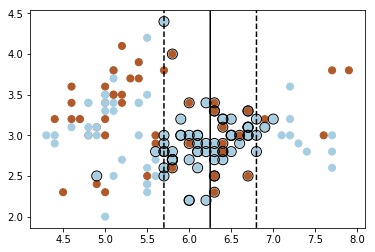

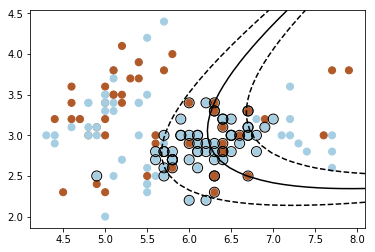

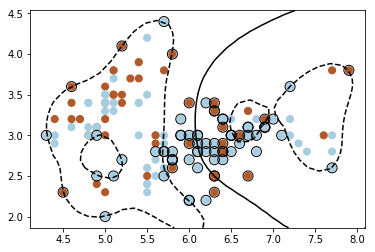

In [0]:
for kernel in ('linear', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=2)
    clf.fit(X_train,y1)
    plt.scatter(ds.iloc[:, 1], ds.iloc[:, 2], c=temp2, s=50, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy)
    Z=Z.reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=1,
              linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
              linewidth=1, facecolors='none', edgecolors='k')
    plt.show()


**References:**
    
    [1] https://www.cvxpy.org/install/
    [2] https://cs.stanford.edu/~tachim/optimization_code.html
    [3] http://cvxopt.org/applications/svm/
    [4] https://pythonprogramming.net/soft-margin-kernel-cvxopt-svm-machine-learning-tutorial/